<ipython-input-3-a3c38e34e68e>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method="ffill")


Unique words in corpus: 13134
Unique tags in corpus: 17
Unique tags are: ['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim', 'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve', 'I-eve', 'I-nat']


<ipython-input-3-a3c38e34e68e>:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence #").apply(agg_func)


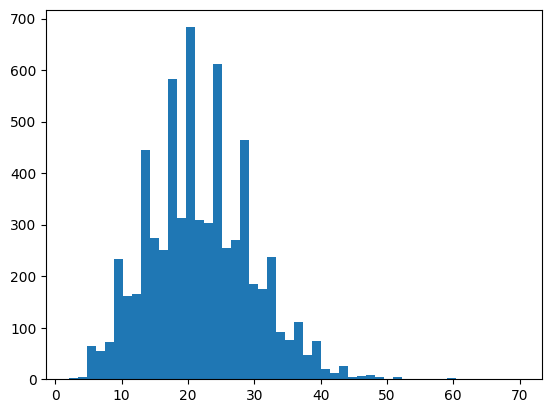

Name: Kishor kumar B.  Register Number:212223240072


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 100, 50)             │         656,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ (None, 100, 50)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 100, 200)            │         120,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 100, 17)             │           3,417 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 780,967 (2.98 MB)

 Trainable params: 780,967 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
166/166 ━━━━━━━━━━━━━━━━━━━━ 56s 273ms/step - accuracy: 0.9330 - loss: 0.5599 - val_accuracy: 0.9673 - val_loss: 0.1394
Epoch 2/3
166/166 ━━━━━━━━━━━━━━━━━━━━ 80s 265ms/step - accuracy: 0.9668 - loss: 0.1276 - val_accuracy: 0.9741 - val_loss: 0.0878
Epoch 3/3
166/166 ━━━━━━━━━━━━━━━━━━━━ 81s 258ms/step - accuracy: 0.9749 - loss: 0.0804 - val_accuracy: 0.9790 - val_loss: 0.0699
Name: Kishor kumar B.  Register Number:212223240072
Name: Kishor kumar B.  Register Number:212223240072
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Word           True 	 Pred

------------------------------
The            O	O
U.S.           B-geo	B-geo
military       O	O
says           O	O
any            O	O
kind           O	O
of             O	O
violation      O	O
of             O	O
the            O	O
religious      O	O
rights         O	O
of             O	O
detainees      O	O
will           O	O
be             O	O
treated        O	O
very           O	O
seriously      O	O
.              O	O
comatose       O	O
coma

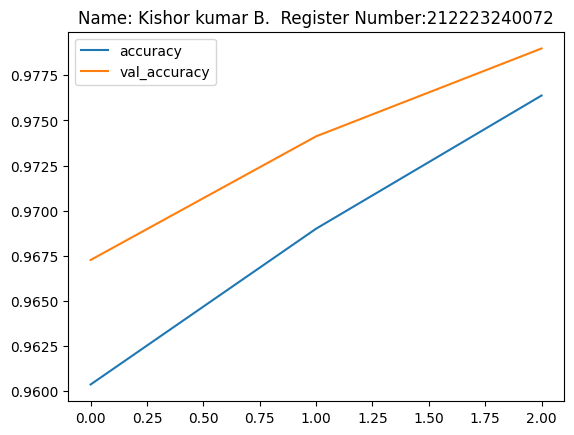

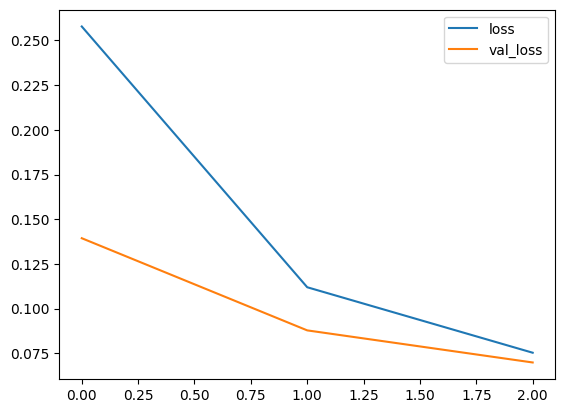

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from keras import layers
from keras.models import Model

data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data.head(50)

data = data.fillna(method="ffill")
data.head(50)

print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

words=list(data['Word'].unique())
words.append("ENDPAD")
tags=list(data['Tag'].unique())

print("Unique tags are:", tags)

num_words = len(words)
num_tags = len(tags)

num_words


class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

getter = SentenceGetter(data)
sentences = getter.sentences

len(sentences)

sentences[0]

word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

word2idx

plt.hist([len(s) for s in sentences], bins=50)
plt.show()

X1 = [[word2idx[w[0]] for w in s] for s in sentences]
type(X1[0])
X1[0]

max_len = 100
X = sequence.pad_sequences(maxlen=max_len,
                  sequences=X1, padding="post",
                  value=num_words-1)

X[0]


y1 = [[tag2idx[w[2]] for w in s] for s in sentences]

y = sequence.pad_sequences(maxlen=max_len,
                  sequences=y1,
                  padding="post",
                  value=tag2idx["O"])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=1)

X_train[0]
y_train[0]
input_word = layers.Input(shape=(max_len,))

embedding_layer = layers.Embedding(input_dim=num_words,output_dim=50,
                                   input_length=max_len)(input_word)

dropout_layer = layers.SpatialDropout1D(0.1)(embedding_layer)

bidirection_lstm = layers.Bidirectional(
    layers.LSTM(units=100,return_sequences=True,
                recurrent_dropout=0.1))(dropout_layer)

output = layers.TimeDistributed(
    layers.Dense(num_tags,activation="softmax"))(bidirection_lstm)

model = Model(input_word, output)

print('Name: Kishor kumar B.  Register Number:212223240072')
model.summary()


model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    batch_size=32,
    epochs=3,
)

metrics = pd.DataFrame(model.history.history)
metrics.head()

print('Name: Kishor kumar B.  Register Number:212223240072')
metrics[['accuracy','val_accuracy']].plot()
plt.title('Name: Kishor kumar B.  Register Number:212223240072')

print('Name: Kishor kumar B.  Register Number:212223240072')
metrics[['loss','val_loss']].plot()

i = 14
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(X_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))